In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [161]:
lst = [cv2.imread(f"data/real_moon_images/PCAM{i}.png") for i in range(1,14)]
lst2 = [cv2.imread(f"data/real_moon_images/TCAM{i}.png") for i in range(1,23)]
l = lst + lst2
arr = np.array(lst)
np.array(lst[1]).shape

(571, 777, 3)

(514, 700, 3)

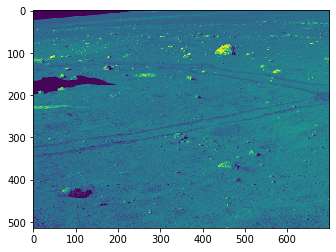

In [92]:
arr = []
im = cv2.imread(f"data/real_moon_images/PCAM14.png")
plt.imshow(im[:,:,0])
im.shape

In [98]:
import cv2
import glob
import numpy as np

X_data = []
files = glob.glob (f"data/real_moon_images/*.png")
for myFile in files:
    image = cv2.imread(myFile)
    X_data.append(image)

print('X_data shape:', np.array(X_data).shape)

data/real_moon_images/g_TCAM12.png
data/real_moon_images/PCAM7.png
data/real_moon_images/TCAM6.png
data/real_moon_images/g_TCAM13.png
data/real_moon_images/TCAM3.png
data/real_moon_images/PCAM5.png
data/real_moon_images/g_TCAM16.png
data/real_moon_images/TCAM11.png
data/real_moon_images/PCAM6.png
data/real_moon_images/g_PCAM6.png
data/real_moon_images/g_PCAM12.png
data/real_moon_images/TCAM10.png
data/real_moon_images/PCAM12.png
data/real_moon_images/TCAM15.png
data/real_moon_images/g_PCAM11.png
data/real_moon_images/g_PCAM4.png
data/real_moon_images/PCAM11.png
data/real_moon_images/g_TCAM9.png
data/real_moon_images/TCAM22.png
data/real_moon_images/g_PCAM10.png
data/real_moon_images/g_PCAM9.png
data/real_moon_images/PCAM9.png
data/real_moon_images/TCAM2.png
data/real_moon_images/TCAM7.png
data/real_moon_images/g_TCAM17.png
data/real_moon_images/TCAM9.png
data/real_moon_images/g_TCAM14.png
data/real_moon_images/g_TCAM11.png
data/real_moon_images/TCAM18.png
data/real_moon_images/g_PCAM3.

array([[[  0,   0, 255, ...,   0,   0, 255],
        [  0,   0, 255, ...,   0,   0, 255],
        [  0,   0, 255, ...,   0,   0, 255],
        ...,
        [  0,   0, 255, ...,   0,   0, 255],
        [  0,   0, 255, ...,   0,   0, 255],
        [  0,   0, 255, ...,   0,   0, 255]],

       [[  0,   0, 255, ...,   0,   0, 255],
        [  0,   0, 255, ...,   0,   0, 255],
        [  0,   0, 255, ...,   0,   0, 255],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]]], dtype=uint8)

In [155]:
stop = cv2.imread("src/555861.jpeg")[:,:,0]

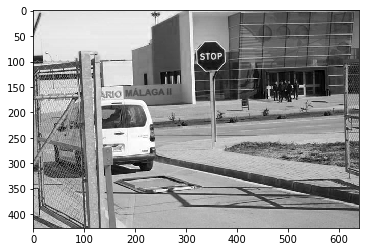

In [156]:
plt.imshow(stop, cmap='gray')

In [157]:
def detect_stop(imagen):
    imagen1 = imagen.copy()
    stop_cascade = cv2.CascadeClassifier("src/cascade.xml")
    rectangulos = stop_cascade.detectMultiScale(imagen1)
    for (x,y,w,h) in rectangulos:
        cv2.rectangle(imagen1, (x,y), (x+w,y+h), (255,0,0), 10)
    return imagen1

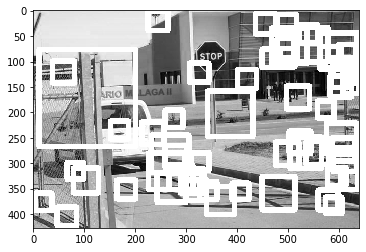

In [158]:
res = detect_stop(stop)
plt.imshow(res, cmap='gray')

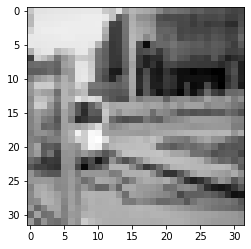

In [159]:
resized = cv2.resize(stop, (32,32), interpolation = cv2.INTER_AREA)
plt.imshow(resized, cmap='gray')

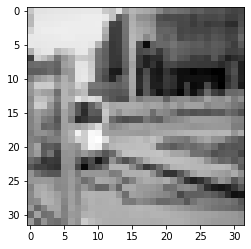

In [160]:
res = detect_stop(resized)
plt.imshow(res, cmap='gray')

In [162]:
import cv2
import pickle
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os

In [163]:
infile = open('data/data8.pickle','rb')
new_dict = pickle.load(infile)
print(new_dict['y_validation'].shape)
print(new_dict['x_train'].shape)

(4410,)
(86989, 1, 32, 32)


In [164]:
stops = new_dict["x_train"][new_dict['y_train']==14]
rest = new_dict["x_train"][new_dict['y_train']!=14]

print(rest.shape, stops.shape)


(84966, 1, 32, 32) (2023, 1, 32, 32)


In [165]:
ind = np.random.choice(np.arange((rest.shape)[0]), size=stops.shape[0], replace=False)
resto = np.asarray([rest[i][0] for i in ind])
resto.shape

(2023, 32, 32)

In [166]:
#creamos nuestro dataset de pos y stop.info
os.remove("stop.info")
f= open("stop.info","w+")
for i,stop in enumerate(stops):
    matplotlib.image.imsave(f'data/training/stop/pos/stop{i}.jpg', stop[0,:,:])   
    f.write(f"data/training/stop/pos/stop{i}.jpg 1 0 0 32 32\n" )
f.close()

In [171]:
#creamos dataset neg
os.remove("bg.txt")
f= open("bg.txt","w+")
for i,r in enumerate(arr[:,:,:,0]):
    matplotlib.image.imsave(f'data/training/stop/neg/neg{i}.jpg', r)
    f.write(f"data/training/stop/neg/neg{i}.jpg\n" )

In [172]:
os.remove("data/classifiers/cascade.xml")
os.remove("data/classifiers/params.xml")
os.remove("data/classifiers/stage0.xml")
os.remove("data/classifiers/stage1.xml")

In [173]:
os.remove("stops.vec")
!opencv_createsamples -info stop.info -num 2000 -w 32 -h 32 -vec stops.vec

Info file name: stop.info
Img file name: (NULL)
Vec file name: stops.vec
BG  file name: (NULL)
Num: 2000
BG color: 0
BG threshold: 80
Invert: FALSE
Max intensity deviation: 40
Max x angle: 1.1
Max y angle: 1.1
Max z angle: 0.5
Show samples: FALSE
Width: 32
Height: 32
Max Scale: -1
RNG Seed: 12345
Create training samples from images collection...
Done. Created 2000 samples


In [183]:
!opencv_traincascade -data data/classifiers -vec stops.vec -bg bg.txt -numPos 200 -numNeg 260 -numStages 4  -w 32 -h 32 -featureType LBP -mode ALL 

PARAMETERS:
cascadeDirName: data/classifiers
vecFileName: stops.vec
bgFileName: bg.txt
numPos: 200
numNeg: 260
numStages: 4
precalcValBufSize[Mb] : 1024
precalcIdxBufSize[Mb] : 1024
acceptanceRatioBreakValue : -1
stageType: BOOST
featureType: LBP
sampleWidth: 32
sampleHeight: 32
boostType: GAB
minHitRate: 0.995
maxFalseAlarmRate: 0.5
weightTrimRate: 0.95
maxDepth: 1
maxWeakCount: 100
Number of unique features given windowSize [32,32] : 27225

===== TRAINING 0-stage =====
<BEGIN
POS count : consumed   200 : 200
Train dataset for temp stage can not be filled. Branch training terminated.
Cascade classifier can't be trained. Check the used training parameters.
